In [1]:
import numpy as np
Xp = np.load('X.out.npy')
#np.random.shuffle(X)

file = Xp
np.random.shuffle(file)
X_train = file[:4900]
X_test = file[4900:5000]
print(X_train.shape)
print(X_test.shape)

(4900, 64, 64)
(100, 64, 64)


In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
#encoding_dim = 1000  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
encoding_dim = 200
# this is our input placeholder
input_img = Input(shape=(4096,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(4096, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
#-------------------------------------------------------------------------
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
print(autoencoder.summary())

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               819400    
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              823296    
Total params: 1,642,696
Trainable params: 1,642,696
Non-trainable params: 0
_________________________________________________________________
None


In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(4900, 4096)
(100, 4096)


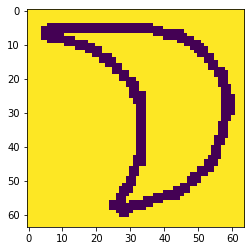

In [4]:
# convert from feed data X_train[0] to numpy and print
arr_inicial = np.zeros(4096,) #initialize numpy array 784x1
arr_inicial = X_train[4899] #assign a photo from data
arr_inicial = arr_inicial.reshape(64,64) #reshape it to original size
from matplotlib import pyplot as plt
plt.imshow(arr_inicial, interpolation='nearest') #print it
plt.show()

In [5]:
autoencoder.fit(X_train, X_train,
                epochs=220,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))


Train on 4900 samples, validate on 100 samples
Epoch 1/220
4900/4900 [==============================] - 2s 381us/step - loss: 0.5833 - val_loss: 0.3691
Epoch 2/220
4900/4900 [==============================] - 2s 354us/step - loss: 0.3537 - val_loss: 0.3470
Epoch 3/220
4900/4900 [==============================] - 2s 345us/step - loss: 0.3462 - val_loss: 0.3447
Epoch 4/220
4900/4900 [==============================] - 2s 382us/step - loss: 0.3447 - val_loss: 0.3439
Epoch 5/220
4900/4900 [==============================] - 2s 383us/step - loss: 0.3438 - val_loss: 0.3429
Epoch 6/220
4900/4900 [==============================] - 2s 346us/step - loss: 0.3433 - val_loss: 0.3419
Epoch 7/220
4900/4900 [==============================] - 2s 342us/step - loss: 0.3426 - val_loss: 0.3415
Epoch 8/220
4900/4900 [==============================] - 2s 375us/step - loss: 0.3418 - val_loss: 0.3411
Epoch 9/220
4900/4900 [==============================] - 2s 395us/step - loss: 0.3410 - val_loss: 0.3404
Epoch 1

Epoch 76/220
4900/4900 [==============================] - 2s 357us/step - loss: 0.2531 - val_loss: 0.2521
Epoch 77/220
4900/4900 [==============================] - 2s 351us/step - loss: 0.2524 - val_loss: 0.2520
Epoch 78/220
4900/4900 [==============================] - 2s 366us/step - loss: 0.2518 - val_loss: 0.2508
Epoch 79/220
4900/4900 [==============================] - 2s 380us/step - loss: 0.2511 - val_loss: 0.2500
Epoch 80/220
4900/4900 [==============================] - 2s 385us/step - loss: 0.2504 - val_loss: 0.2500
Epoch 81/220
4900/4900 [==============================] - 2s 358us/step - loss: 0.2498 - val_loss: 0.2492
Epoch 82/220
4900/4900 [==============================] - 2s 363us/step - loss: 0.2491 - val_loss: 0.2482
Epoch 83/220
4900/4900 [==============================] - 2s 362us/step - loss: 0.2484 - val_loss: 0.2480
Epoch 84/220
4900/4900 [==============================] - 2s 354us/step - loss: 0.2478 - val_loss: 0.2472
Epoch 85/220
4900/4900 [======================

Epoch 153/220
4900/4900 [==============================] - 2s 368us/step - loss: 0.2095 - val_loss: 0.2111
Epoch 154/220
4900/4900 [==============================] - 2s 360us/step - loss: 0.2091 - val_loss: 0.2107
Epoch 155/220
4900/4900 [==============================] - 2s 362us/step - loss: 0.2087 - val_loss: 0.2106
Epoch 156/220
4900/4900 [==============================] - 2s 372us/step - loss: 0.2082 - val_loss: 0.2097
Epoch 157/220
4900/4900 [==============================] - 2s 387us/step - loss: 0.2078 - val_loss: 0.2095
Epoch 158/220
4900/4900 [==============================] - 2s 394us/step - loss: 0.2073 - val_loss: 0.2091
Epoch 159/220
4900/4900 [==============================] - 2s 366us/step - loss: 0.2069 - val_loss: 0.2087
Epoch 160/220
4900/4900 [==============================] - 2s 368us/step - loss: 0.2064 - val_loss: 0.2084
Epoch 161/220
4900/4900 [==============================] - 2s 365us/step - loss: 0.2060 - val_loss: 0.2080
Epoch 162/220
4900/4900 [============

In [6]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

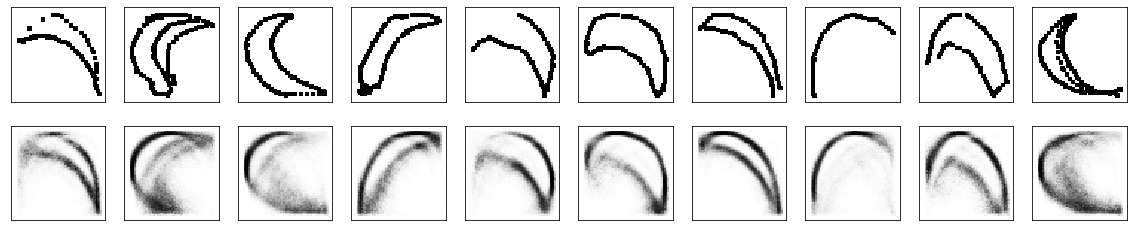

In [7]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Autocodificador Convolucional Profundo

In [8]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(64, 64, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = UpSampling2D((2, 2))(x)
#x = Conv2D(32, (3, 3), activation='relu')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
print(autoencoder.summary())


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 32, 32, 32)        0  

In [10]:
file = Xp
np.random.shuffle(file)
X_train = file[:4900]
X_test = file[4900:]

import numpy as np

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = np.reshape(X_train, (len(X_train), 64, 64, 1))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 64, 64, 1))  # adapt this if using `channels_first` image data format
print(X_train.shape)
print(X_test.shape)

(4900, 64, 64, 1)
(100, 64, 64, 1)


In [11]:
from keras.callbacks import TensorBoard

history = autoencoder.fit(X_train, X_train,
                epochs=12,
                batch_size=1000,
                shuffle=True,
                validation_data=(X_test, X_test))
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
#autoencoder.save('./modelos/banana.h5')

Train on 4900 samples, validate on 100 samples
Epoch 1/12
4900/4900 [==============================] - 67s 14ms/step - loss: 0.5518 - val_loss: 0.4120
Epoch 2/12
4900/4900 [==============================] - 74s 15ms/step - loss: 0.3974 - val_loss: 0.3710
Epoch 3/12
4900/4900 [==============================] - 76s 16ms/step - loss: 0.3643 - val_loss: 0.4098
Epoch 4/12
4900/4900 [==============================] - 71s 14ms/step - loss: 0.3454 - val_loss: 0.3385
Epoch 5/12
4900/4900 [==============================] - 69s 14ms/step - loss: 0.3198 - val_loss: 0.2892
Epoch 6/12
4900/4900 [==============================] - 67s 14ms/step - loss: 0.3046 - val_loss: 0.2393
Epoch 7/12
4900/4900 [==============================] - 67s 14ms/step - loss: 0.2549 - val_loss: 0.2576
Epoch 8/12
4900/4900 [==============================] - 68s 14ms/step - loss: 0.2223 - val_loss: 0.1938
Epoch 9/12
4900/4900 [==============================] - 73s 15ms/step - loss: 0.2024 - val_loss: 0.1704
Epoch 10/12
4900/

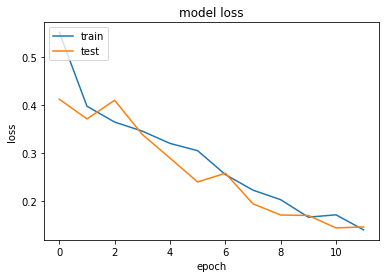

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

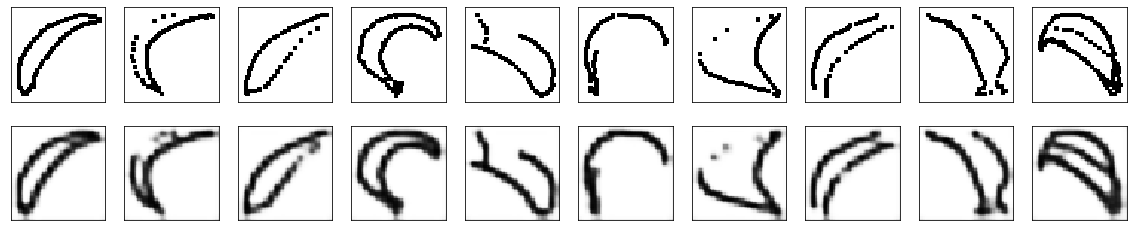

In [13]:
import matplotlib.pyplot as plt
# encode and decode some digits
# note that we take them from the *test* set
#encoded_imgs = encoder.predict(X_test)
#decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1+ n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

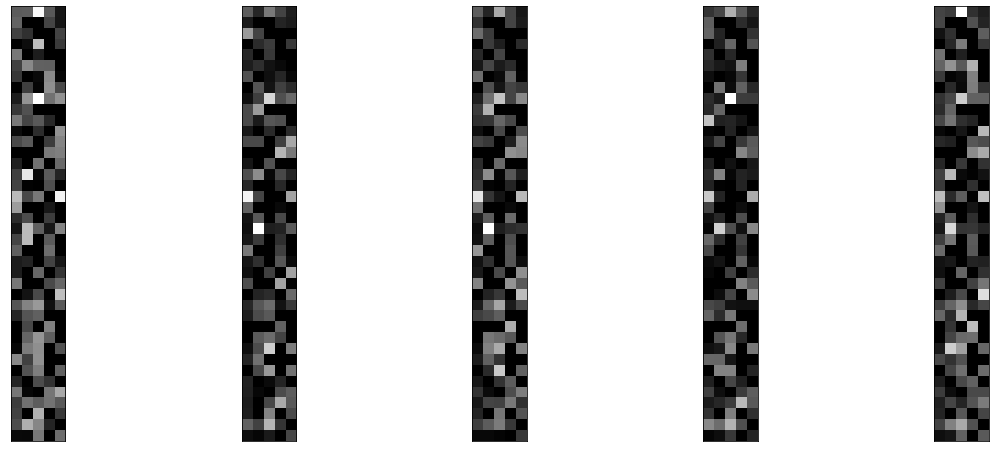

In [14]:
n = 5
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(5, 40).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()